<h1>AI_SUMMATIVE</h1></br>
<h3>Group 2C2</h3>
<li>Group Members:
<u1>Audrey Njenga</u1>
<u1>Kelvin Wachira</u1>
<u1>Ziithe Ewen Hiwa</u1>
<u1>Edward Obala</u1></li></br>
<h3>ANALYSIS OF MALARIA PATTERNS FOR MEDICAL RESOURCE DISTRIBUTION</h3></br>
<p>For our AI project we are making a predictive model that can be used by drug production and distribution companies to centre their operations around. Having a set regional target will help them know where and when to invest heavily into. This system is paid for and will help in targeted treatment of patients, saving of resources and increasing the chances of handling Malaria in African Countries</p>

In [1]:
# imports modules that we will need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# upload document
datafile=pd.read_csv("DatasetAfricaMalaria.csv")
datafile

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


<h3>Cleaning process</h3>

In [3]:
# start by identifying all the columns in the dataset
datafile.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [4]:
# perform a value count for datafile to know how many elements to expect from each column
datafile.count()
# datafile

Country Name                                                                               594
Year                                                                                       594
Country Code                                                                               594
Incidence of malaria (per 1,000 population at risk)                                        550
Malaria cases reported                                                                     550
Use of insecticide-treated bed nets (% of under-5 population)                              132
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    122
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      106
People using safely managed drinking water services (% of population)                       99
People using safely managed drinking water services, rural (% of rural population)          88
People using safely managed drinking water service

In [5]:
# Most of the columns on access to drinking water services are empty
# Use of these will lead to misinformation
# and I can not fill them with fillna(bfill, ffill) as they have gaps and the averagee will me misinformed as there 
# are a lot of gaps in between
listy=["People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                        "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                        "Use of insecticide-treated bed nets (% of under-5 population)",
                        "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                        "People using safely managed sanitation services (% of population)",
                        "People using safely managed sanitation services, rural (% of rural population)",
                        "People using safely managed sanitation services, urban  (% of urban population)"
                       ]
# dropping the rows in the list above
for i in listy:
    datafile=datafile.drop([i], axis='columns')



In [6]:
datafile.count()

Country Name                                                                          594
Year                                                                                  594
Country Code                                                                          594
Incidence of malaria (per 1,000 population at risk)                                   550
Malaria cases reported                                                                550
Rural population (% of total population)                                              588
Rural population growth (annual %)                                                    588
Urban population (% of total population)                                              588
Urban population growth (annual %)                                                    588
People using at least basic drinking water services (% of population)                 588
People using at least basic drinking water services, rural (% of rural population)    566
People usi

In [7]:
# used bfill to fill it with similar content in specific countries
# SO if the country is Rwanda then it is filled with similar data from Rwanda from previous years and if it is 
# Kenya it is backkfilled with similar data from past years
all_countries=datafile["Country Name"].drop_duplicates()
for i in all_countries:
    datafile.loc[(datafile["Country Name"]==i)]=datafile.fillna(method="bfill")

In [8]:
datafile.count()

Country Name                                                                          594
Year                                                                                  594
Country Code                                                                          594
Incidence of malaria (per 1,000 population at risk)                                   594
Malaria cases reported                                                                594
Rural population (% of total population)                                              594
Rural population growth (annual %)                                                    594
Urban population (% of total population)                                              594
Urban population growth (annual %)                                                    594
People using at least basic drinking water services (% of population)                 594
People using at least basic drinking water services, rural (% of rural population)    594
People usi

<h3>Data Analysis</h3>

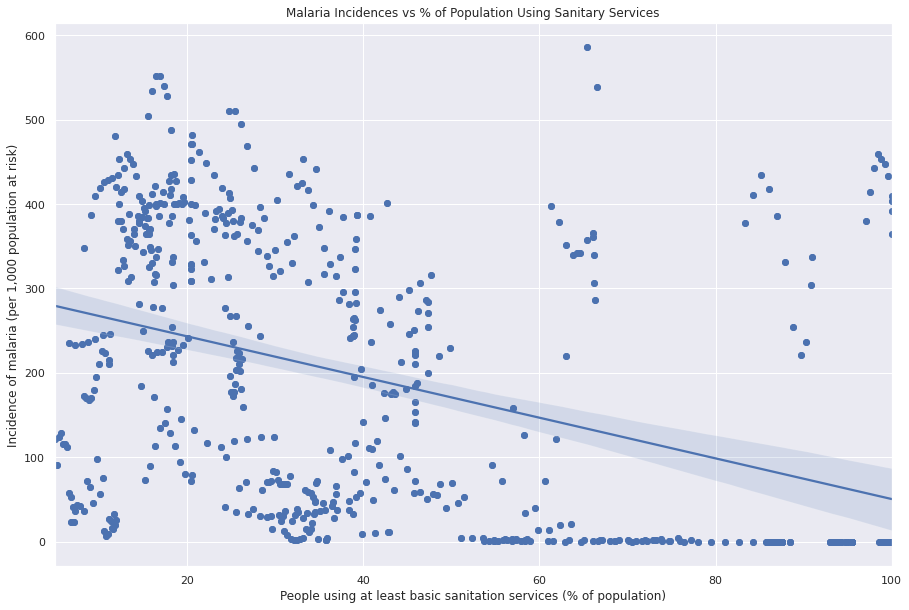

In [9]:
# Malaria cases against percentage of people using sanitary services
sns.set()
plt.scatter(datafile["People using at least basic sanitation services (% of population)"],datafile["Incidence of malaria (per 1,000 population at risk)"])
ax = sns.regplot(x=datafile["People using at least basic sanitation services (% of population)"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
plt.title("Malaria Incidences vs % of Population Using Sanitary Services")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)

<h4>Conclusion</h4>

From the above scatter plot we see that the number of cases of malaria is inversely proportional to the % of people using basic. The negative linear relationship shows that with a steady increase of sanitary service utilisation there was also a steady decrease in the number of Malaria instances.

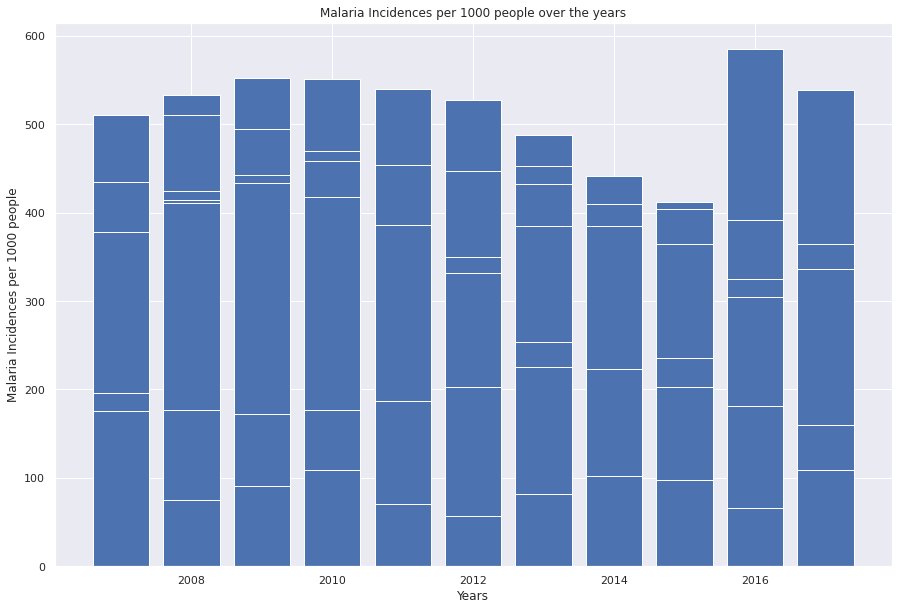

In [24]:
# Number of Malaria Incidences per 1000 people cases each year
plt.bar(datafile["Year"], datafile["Incidence of malaria (per 1,000 population at risk)"])
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)
plt.title("Malaria Incidences per 1000 people over the years")
plt.xlabel("Years")
plt.ylabel("Malaria Incidences per 1000 people")
plt.savefig('incidences_vs_year.jpg', dpi=300)

***Conclusion***</br>
From the visualization of the number of instances, we can see that in the late 2000s there was a consistent rise in the number of cases till 2010 from which there was a consistent drop in cases till 2016 where the was an immense rise in the number of cases.
This can be attributed to multiple factors that we can not pinpoint. A rise in global temperatures might make the environment suitable for mosquitoes or even maybe better data collection methods has made it that more data on the number of infected patients was collected. Because of this, we can make whatever assumptions we want to explain the data if we have not referred to any other third party resources.


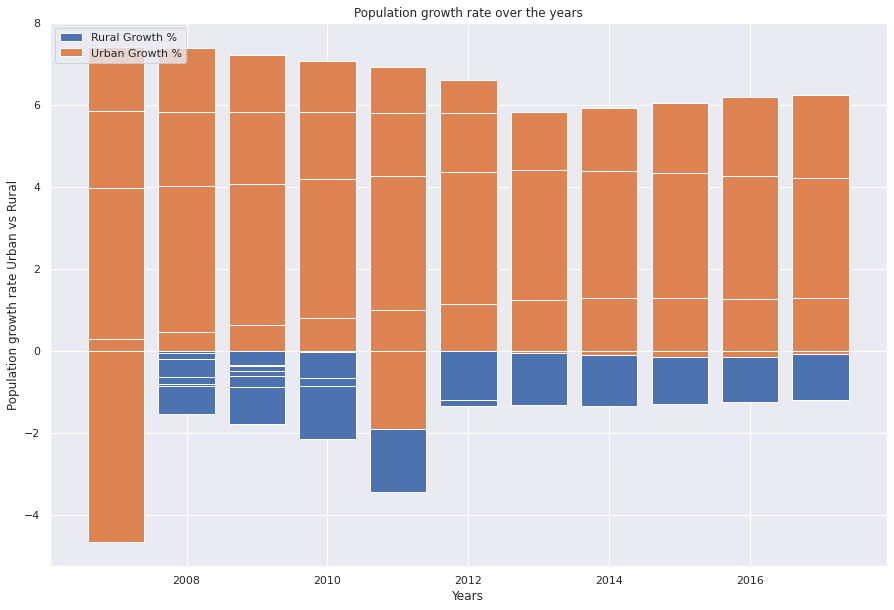

In [23]:
# Population growth over the years
plt.bar(datafile["Year"], datafile["Rural population growth (annual %)"], label="Rural Growth %")
plt.bar(datafile["Year"], datafile["Urban population growth (annual %)"], label="Urban Growth %")
plt.legend(loc="upper left")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)
plt.title("Population growth rate over the years")
plt.xlabel("Years")
plt.ylabel("Population growth rate Urban vs Rural")
plt.savefig('population_growth.jpg', dpi=300)

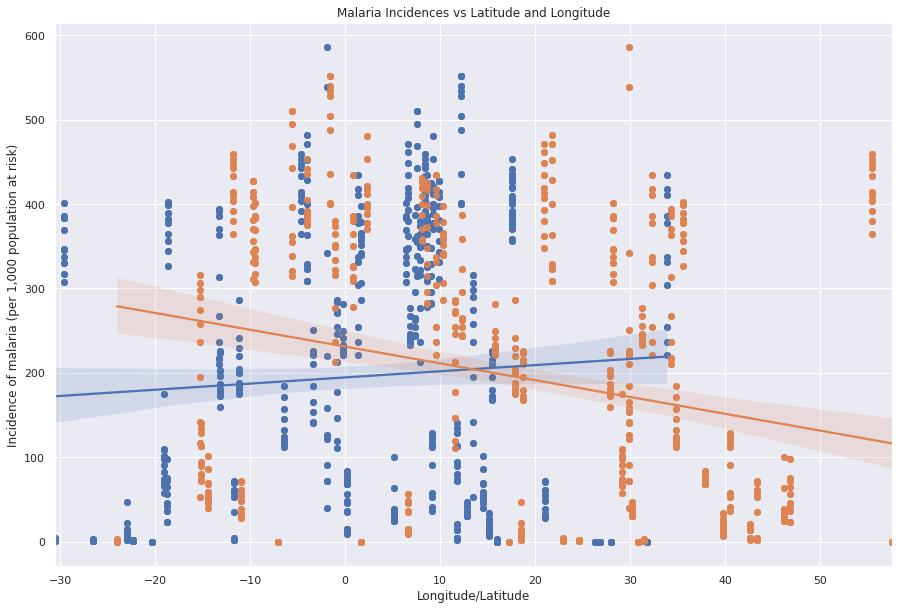

In [27]:
# Malaria cases against percentage of people using sanitary services
sns.set()
plt.scatter(datafile["latitude"],datafile["Incidence of malaria (per 1,000 population at risk)"], label="Latitude")
plt.scatter(datafile["longitude"],datafile["Incidence of malaria (per 1,000 population at risk)"], label="Longitude")
ax = sns.regplot(x=datafile["latitude"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
ax = sns.regplot(x=datafile["longitude"], y=datafile["Incidence of malaria (per 1,000 population at risk)"], data=datafile)
plt.title("Malaria Incidences vs Latitude and Longitude")
plt.xlabel("Longitude/Latitude")
fig = plt.gcf()
fig.set_size_inches(15.0, 10.0)
plt.savefig('lat_long_vs_incidences.jpg', dpi=300)

<h4>Conclusion</h4>
From the dataset, we looked at the latitude at all the case points and the longitude as well. From this we extracted the above plot of where the Latitude and Longitude crossed. The region where they crossed presented the place which was the most likely location to have a large number of cases.
Approximately the longitude and latitude were +13 degrees and +13 degrees respectively. Which lead us to the Northern Region of Nigeria.
From our basic assumptions without looking at any third party resources we assumed that this is likely to be true as Nigeria also faces the Malaria pandemic and also has a large population which should reflect heavily on the dataset.


<h3>Feature Analysis</h3>

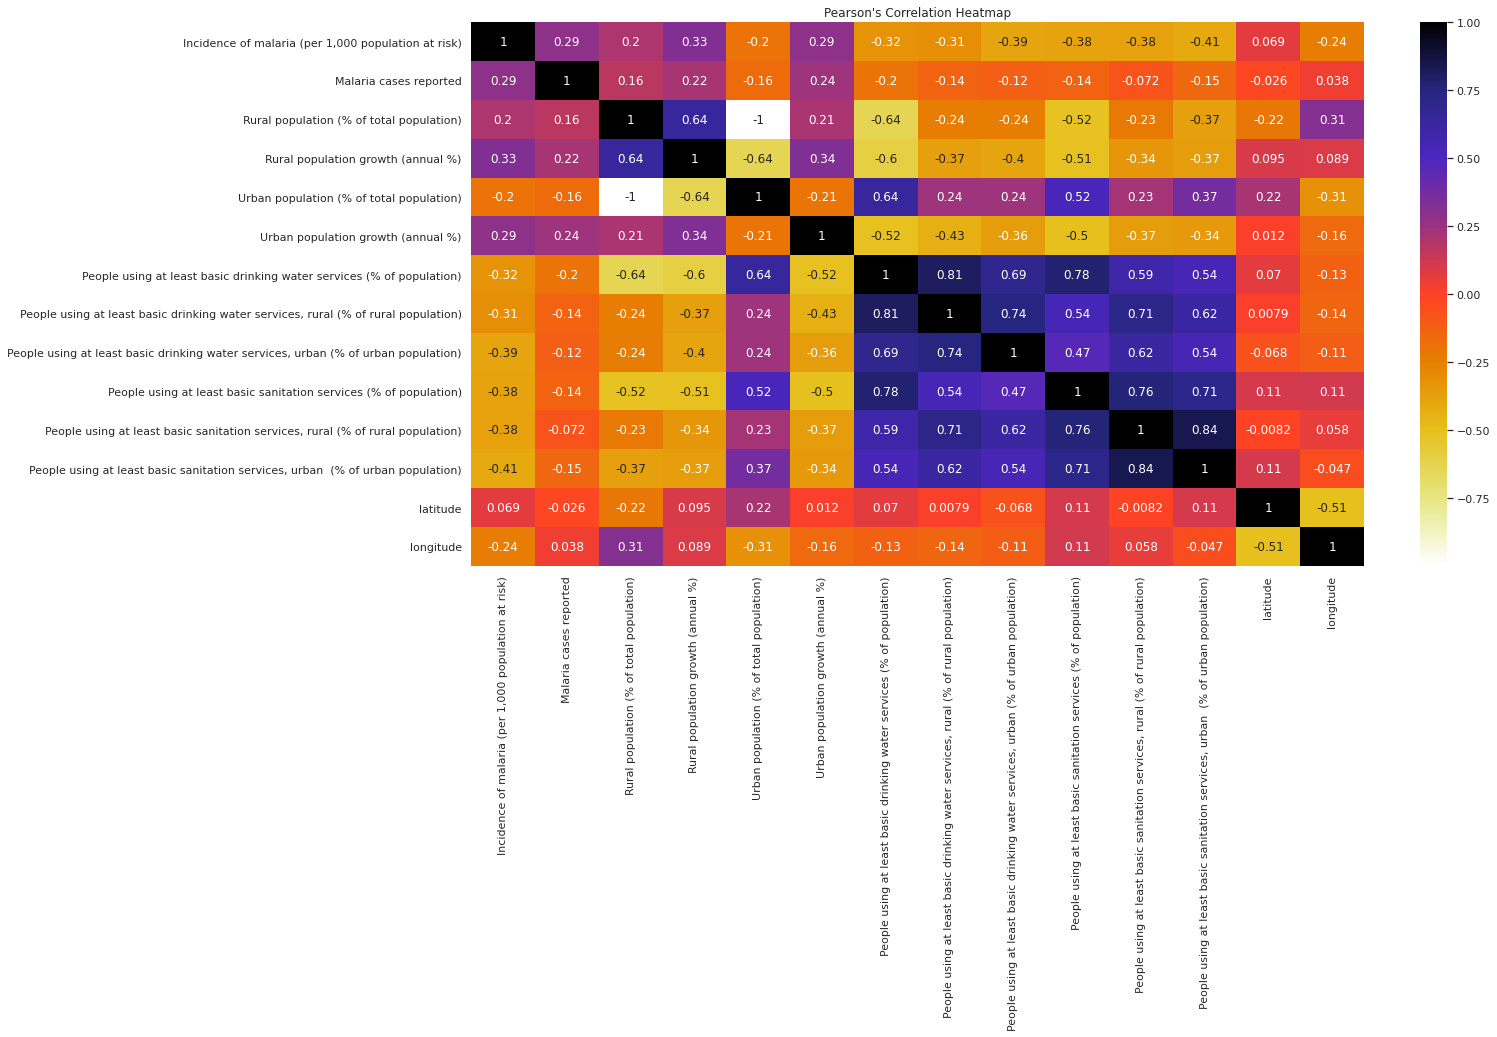

<Figure size 432x288 with 0 Axes>

In [30]:
# Using correlation
# Using Variance

# Pearsons correlation map
plt.figure(figsize=(20,10))
cor=(datafile.drop(['Country Code','Country Name','geometry','Year'], axis=1)).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("Pearson's Correlation Heatmap")
plt.show()
plt.savefig('correlation.png', dpi=300)

<h4>Conclusion on Correlation</h4></br>
<p>The features were within the range of <strong>-0.3 and +0.3</strong> WHich is considered to have weak or poor correlation</p></br>
<p>This means that the model will have poor accuracy in terms of the features used in correlation with our target value which is the number of Malaria cases reported </p>

<h3>Association of Categorical values such as Year and Country</h3>

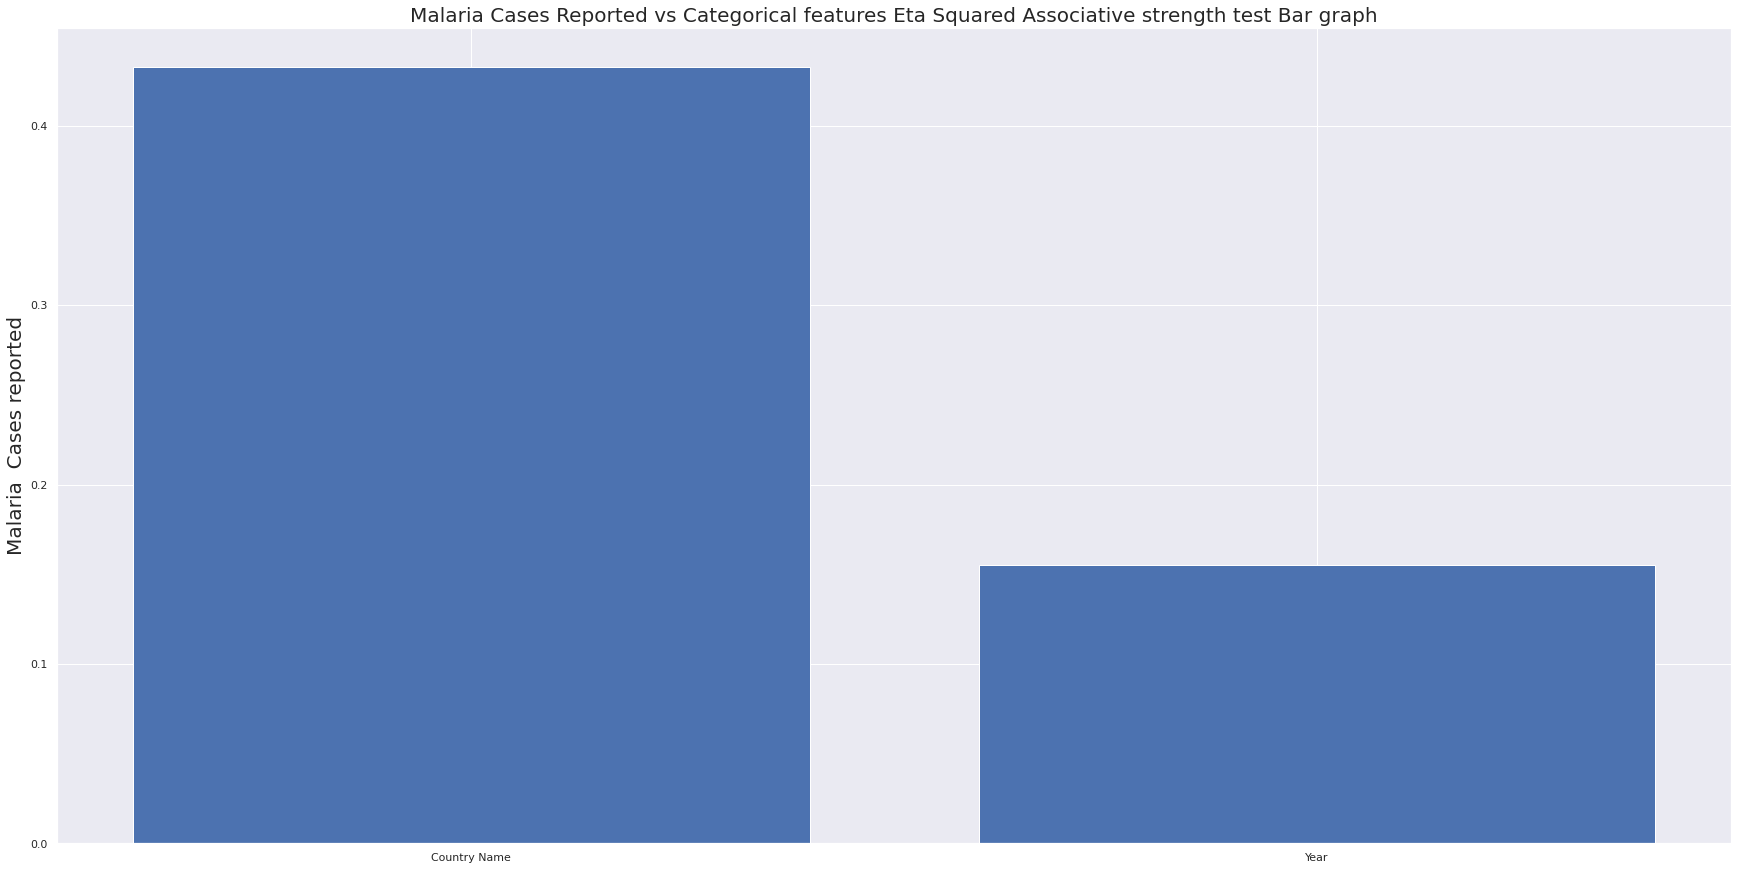

In [28]:
# performing an Eta squared operation on the Categorical data
# I will represent this on the data
# importing pingouin to use Eta squared
# download pingouin using pip install in python
# pip install pingouin/pip3 install pingouin
import pingouin as pg
# 
# Not using country code as well cause it is already represented by Country name
categorical_features=datafile[['Year','Country Name']]
# 
# cat_features
cat_features=['Year','Country Name']
# to get rid of multi indexing
categorical_features.columns = categorical_features.columns.get_level_values(0)

# disctionary to have all the categorical features in line with its associative strength
correlation_categories={}

# Eta squared operation
for i in cat_features:
    aov=pg.anova(dv="Malaria cases reported", between=i, data=datafile, detailed=True)
    correlation_categories[i]=aov.iloc[0,6]

# Sortinng the dictionary in descending order to represent the data that way too
import operator
correlation_categories=dict( sorted(correlation_categories.items(), key=operator.itemgetter(1),reverse=True))


# To plot each value against the sale price
plt.figure(figsize=(30,15))
plt.bar(correlation_categories.keys(), correlation_categories.values())
plt.ylabel("Malaria  Cases reported", fontsize=20)
plt.title("Malaria Cases Reported vs Categorical features Eta Squared Associative strength test Bar graph", fontsize=20)
plt.savefig('Eta squared', dpi=300)


# Zoom in with double left click

<h4>Conclusion of Eta Squared test on all the continous variable</h4></br>

<p>I used Eta squared because Eta squared is intended for use with categorical independent variables and continuous DVs.</p>
<strong>NOTE: Eta Squared Performance Range</strong></br>
<li>
    <ul>Large - 1.00>=0.14</ul>
    <ul>Medium - 0.14>0.06</ul>
    <ul>Small - 0.06>0.01</ul>
    <ul>Negligable - 0.01>0.00</ul>
</li>

</br>
<p>The features Year and Country have a very strong association to the number of cases Reported</p>


The image above represents the Eta score of the year and Country Name. Which all had a score higher than +0.14 representing that both have a strong associative strength with the number of Malaria Instance.
Meaning that they are both very important to determine the potential number of cases of Malaria and can not be dropped.
NOTE: They are both either categorical or ordinal data. The country is categorical data as it has no order and Year is Ordinal data as it has an order. The ETA score is used to determine the association strength between categorical/ordinal data and numerical/continuous data

In [15]:
variance=datafile.drop(['Year','Country Name','Country Code','geometry'], axis=1).var()
variance

position=0
print("\nVariance of all the numerical data in full representation\n"+"__________________________________________________\n")
for i in (variance):
    print (str(position)+":  "+str(i))
    if i<1:
#         print("Has a low variance is not good for prediction")
        low_variance_list.append(position)
    position+=1


Variance of all the numerical data in full representation
__________________________________________________

0:  27241.903998883954
1:  4867778694768.429
2:  327.78586933557034
3:  1.4310380105154987
4:  327.778008291175
5:  2.1416969413073974
6:  298.7339932833106
7:  351.4231253936214
8:  88.04644119327054
9:  688.359928722867
10:  571.7449694701368
11:  483.27136779146156
12:  245.80675607910624
13:  401.65197376145903


<h2>Variance Conclusion</h2></br>
<p>None of the said values have a low varicane but some of the above values have extremely high variance which means that there are a couple of outliers in the coolumns with such vairiance. IN such columns that is allowed but in some other columns this is not greatly appreciated</p>

<h2>Feature Analysis Conclusion</h2></br>
<p>From the above analysis I have concluded that we can not drop the features based off correlation as that weakens the model further as most of the features already have a weak correlation.</p>
</br>
<p>The Eta Squared theorem shows a strong associative strength between country, year and the number of cases reported.Meaning the country you are from and the year it is likely influnced the number of cases of Malaria reported heavily.</p>
</br>
<p>The Variance shows the columns Incidence of malaria (per 1,000 population at risk) and Malaria cases reported have a lot of outliers which we should consider dropping</p>

<h3>Model Training and Use</h3>

In [16]:
# importing the needed moduluses
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

/home/edward/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [17]:
lrg=LinearRegression()
# dropping the country code and Malaria cases which is the target
for_training=datafile.drop(['Country Code',"Malaria cases reported","geometry"], axis=1)
target_value=datafile["Malaria cases reported"]
# splitting it to a train and test data
x_train, x_test, y_train, y_test=train_test_split(for_training,target_value, test_size=0.1, random_state=10)



In [18]:
# Create dummy variables
# le=LabelEncoder()
trainle, testle=x_train,x_test

In [19]:
# for i in ["Country Name","Year"]:
#     trainle[i]=le.fit_transform(trainle[i])
#     testle[i]=le.fit_transform(testle[i])

In [20]:
# The handle unknown argmument makes sure it ignores any new categories it had not seen
ohe=OneHotEncoder()

# Using a transofmer I can pick the select columns that are to be One Hot Encoded
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),["Country Name","Year"]),remainder='passthrough' )


# making a pipeline that will do the following steps o  the data
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans, lrg)

In [21]:
# training the model
pipe.fit(trainle,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country Name', 'Year'])])),
                ('linearregression', LinearRegression())])

In [22]:
# Checking the models accuracy on the Test data this is to avoid overfitting
pipe.score(testle,y_test)

0.6968605402665771